# **Bag-of-Words Document Representation**

## Abstract

The aim of this notebook is to implement a Bag-of-words model using  **Scikit-learn**’s `CountVectorizer` and **Keras**'s `TextVectorization` layer. The model is then used to extract numeric features from a toy corpus just for demonstration purposes.

>[Bag-of-Words Language Representation](#folderId=1IO7QIQ58ZWLr4tPoXvYZ9h-QGg3XDpGf&updateTitle=true&scrollTo=yluuWJga660x)

>>[Abstract](#folderId=1IO7QIQ58ZWLr4tPoXvYZ9h-QGg3XDpGf&updateTitle=true&scrollTo=8XLield6G7B2)

>>[Introduction](#folderId=1IO7QIQ58ZWLr4tPoXvYZ9h-QGg3XDpGf&updateTitle=true&scrollTo=5LRNpGBQ7Er7)

>>[Bag-of-Words Model](#folderId=1IO7QIQ58ZWLr4tPoXvYZ9h-QGg3XDpGf&updateTitle=true&scrollTo=Aw14qTVwHu5j)

>>[Import Libraries](#folderId=1IO7QIQ58ZWLr4tPoXvYZ9h-QGg3XDpGf&updateTitle=true&scrollTo=CItb9WXyKm9y)

>>[Corpus](#folderId=1IO7QIQ58ZWLr4tPoXvYZ9h-QGg3XDpGf&updateTitle=true&scrollTo=rBJALmsKLKiD)

>>[Scikit-learn’s CountVectorizer](#folderId=1IO7QIQ58ZWLr4tPoXvYZ9h-QGg3XDpGf&updateTitle=true&scrollTo=uIwFlmXWL5P2)

>>[Keras's TextVectorization Layer](#folderId=1IO7QIQ58ZWLr4tPoXvYZ9h-QGg3XDpGf&updateTitle=true&scrollTo=zkKk0f_rL_dO)



## Introduction

Language Representation refers to the numerical encoding of natural language, which is an essential step in any NLP pipeline as machine learning methods only deal with numeric entites. For instance, neural networks only accept vectorized inputs. Thus, when processing images, they can be represented as flattened one-dimensional vectors of all their pixel values. This encoding creates a vector space where similar images have similar corresponding vectors. The figure below shows that increasing the brightness of an image, results in the same vector of the original image with a larger magnitude.




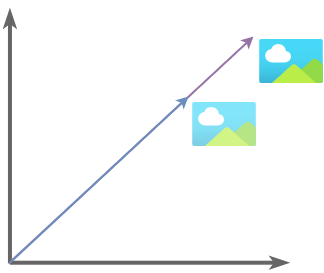

Similarly, the goal of language representation is to encode natural language (terms or documents) in a vector space where similar vectors correspond to similar pieces of text, as shown in the figure below.

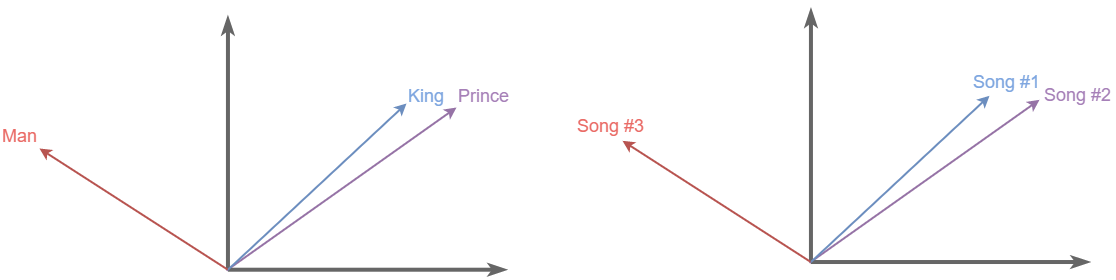

## Bag-of-Words Model

The **bag-of-words** model is the simplest method to extract numeric features from textual data. 

It’s an algorithm that transforms documents into fixed-length vectors. It does so by generating a vocabulary from the corpus and producing a vector of words counts $x$ for each instance, where $x_i$ is the count of the word $w_i$ found in the vocabulary at index $i$. This means that the vector's length is equal to that of the corpus vocabulary.

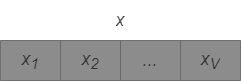

Thus, it produces a sparse text representation (instance-word matrix) that includes information solely about the count of each word in the documents, and not the order or structure in which the words appear in. Yet the bag-of-words model is surprisingly effective as individual words can be strong predictors for certain classification tasks.


## Import Libraries

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.layers import TextVectorization

import pandas as pd

## Corpus

In [23]:
corpus = [
    "I love NLP.",
    "NLP is a very interesting topic.",
    "I love NLP. I also love doing NLP projects."
]

## Scikit-learn’s `CountVectorizer`

Scikit-learn's [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) connvert a collection of text documents to a matrix of token counts.

As shown in the DataFrame below, `CountVectorizer` default tokenizer considers only tokens of two or more alphanumeric characters (punctuation is completely ignored and always treated as a token separator).

In [39]:
# Instanciate a CountVectorizer Object
vectorizer = CountVectorizer()

# Generate the vocabulary and use it to create the instance-word sparse matrix
instance_word_bow_matrix = vectorizer.fit_transform(corpus)
instance_word_bow_matrix_array = instance_word_bow_matrix.toarray()

# Get the generated vocabulary mappings
vocabulary_word_to_idx = vectorizer.vocabulary_
vocabulary_idx_to_word = dict((v, k) for k, v in vocabulary_word_to_idx.items())

# Get feature names (vocabulary words)
vocabulary_words_array = vectorizer.get_feature_names_out()

In [40]:
df = pd.DataFrame(
    instance_word_bow_matrix_array, 
    columns=vocabulary_words_array)
df

,also,doing,interesting,is,love,nlp,projects,topic,very
0,0,0,0,0,1,1,0,0,0
1,0,0,1,1,0,1,0,1,1
2,1,1,0,0,2,2,1,0,0


## Keras's `TextVectorization` Layer

Keras's [TextVectorization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization) is a Keras preprocessing layer which maps text features to integer sequences.

As shown in the DataFrame below, `TextVectorization` adds a `UNK` token for out-of-vocabulary tokens.

In [66]:
# Instanciate the layer
vectorize_layer = TextVectorization(output_mode="count")

# Generate the vocabulary and use it to create the instance-word sparse matrix
vectorize_layer.adapt(corpus)
instance_word_bow_matrix = vectorize_layer(corpus)
instance_word_bow_matrix_array = instance_word_bow_matrix.numpy().astype(int)

# Get feature names (vocabulary words)
vocabulary_words_array = vectorize_layer.get_vocabulary()

In [69]:
df = pd.DataFrame(
    instance_word_bow_matrix_array, 
    columns=vocabulary_words_array)
df

,[UNK],nlp,love,i,very,topic,projects,is,interesting,doing,also,a
0,0,1,1,1,0,0,0,0,0,0,0,0
1,0,1,0,0,1,1,0,1,1,0,0,1
2,0,2,2,2,0,0,1,0,0,1,1,0
